In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading
df=pd.read_csv("C:\\Users\\shivangi\\OneDrive\\Desktop\\New folder\\california_housing_loss_charts\\housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
# preprocessing
df.info()
df.describe()
df.isnull()
df.isnull().sum()
df=df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [29]:
# split into train and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x = df[["housing_median_age"]]
y = df["median_house_value"]
x_train, x_test, y_train, y_test = train_test_split(x,y)
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [35]:
# error measured
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = reg.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: ",mae)
print("MSE: ",mse)
print("R2 error: ",r2)

MAE:  91303.95992966692
MSE:  13343103768.810356
R2 error:  0.011426270783658987


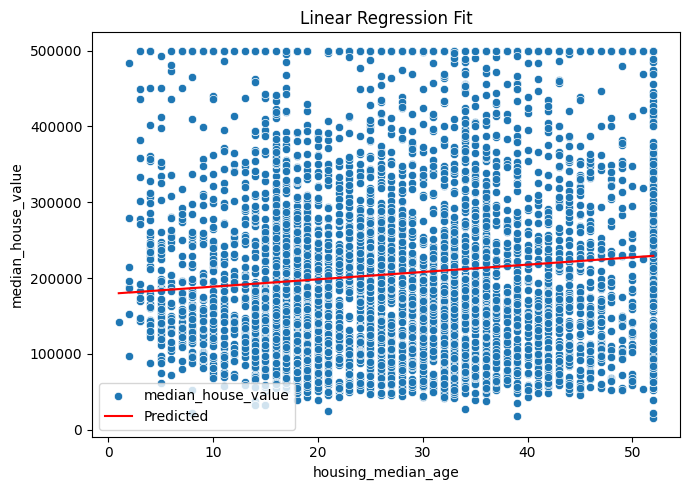


Equation:  housing_median_age × 968.3149  +  178979.5962
A one-unit increase in housing_median_age is associated with an average change of 968.3149 in median_house_value, holding everything else constant.


In [45]:
# plotting linear regression
plt.figure(figsize=(7,5))
sns.scatterplot(x=x_test["housing_median_age"], y=y_test, label="median_house_value")
sns.lineplot(
    x=x_test["housing_median_age"],
    y=y_pred,
    color="red",
    label="Predicted"
)
plt.title("Linear Regression Fit")
plt.xlabel("housing_median_age")
plt.ylabel("median_house_value")
plt.legend()
plt.tight_layout()
plt.show()

# Coefficient interpretation
intercept = reg.intercept_
slope     = reg.coef_[0]
print(f"\nEquation:  {reg.feature_names_in_[0]} × {slope:.4f}  +  {intercept:.4f}")
print(f"A one-unit increase in housing_median_age is associated with an average "
    f"change of {slope:.4f} in median_house_value, holding everything else constant.")